In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample

# 3.2

In [2]:
ar = np.array([1, 0.2, -1.3])
ma = np.array([1])
np.random.seed(1536)

In [3]:
x = arma_generate_sample(ar=ar, ma = [1], nsample=500)

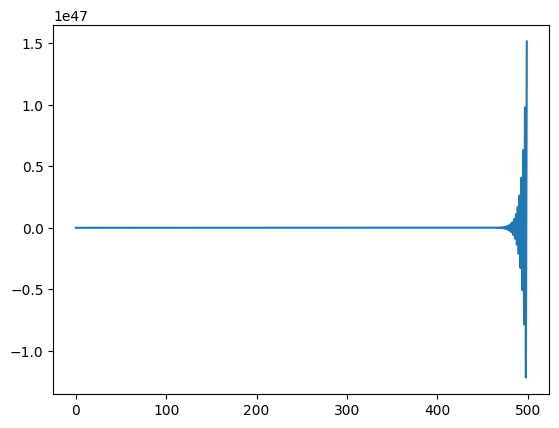

In [4]:
plt.plot(x)

In [5]:
from PythonTsa.plot_acf_pacf import acf_pacf_fig

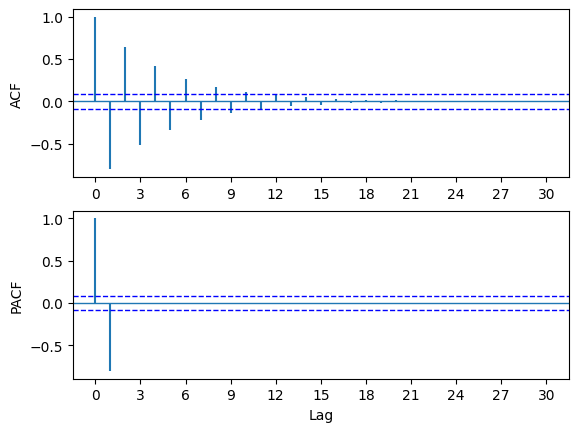

In [6]:
acf_pacf_fig(x, both = True)

In [7]:
roots = np.roots(ar)
print("Raízes do polinômio autoregressivo:", roots)


Raízes do polinômio autoregressivo: [-1.24455231  1.04455231]


para ser estácionario precisariamos que |$\phi_2$| < 1, 
$\phi_2 + \phi_1$ < 1 e 
$\phi_1 + \phi_2$ < 1. 
Vemos que não é o caso

# 3.10

mod1

In [8]:
ar_1 = np.array([1, 1.8, 0.8])
ma_1 = np.array([1,0.2,-0.6])

In [9]:
x1 = arma_generate_sample(ar=ar_1, ma =ma_1, nsample=500)

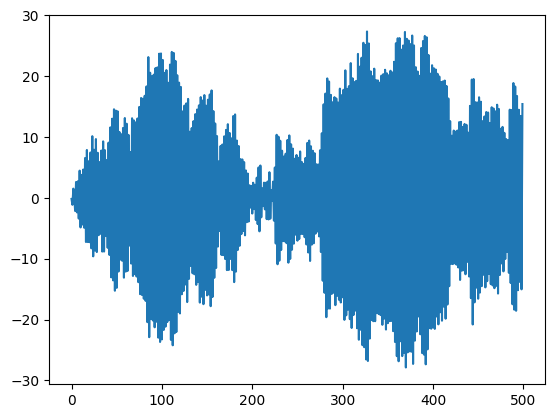

In [10]:
plt.plot(x1)

In [11]:
roots1 = np.roots(ar_1)
print("Raízes do polinômio autoregressivo:", roots1)

Raízes do polinômio autoregressivo: [-1.  -0.8]


In [12]:
from PythonTsa.CheckStationarynInvertible import isstationary, isinvertible

In [22]:
import statsmodels.api as sm
import statsmodels.tsa.arima_process as ap

In [23]:
arma1 = sm.tsa.ArmaProcess(ar_1, ma_1)

In [25]:
isstationary(arma1)

False

In [26]:
isinvertible(arma1)

True

mod2

In [28]:
ar_2 = np.array([1, 0.8, -0.8, 0.4])
ma_2 = np.array([1,0.2,-0.6, 0.3])

In [29]:
x2 = arma_generate_sample(ar=ar_2, ma =ma_2, nsample=500)

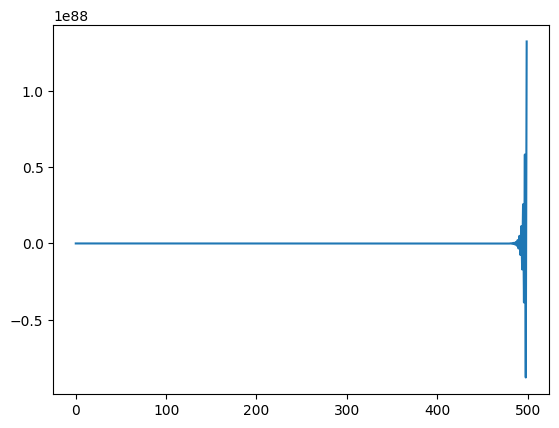

In [30]:
plt.plot(x2)

In [31]:
roots2 = np.roots(ar_2)
print("Raízes do polinômio autoregressivo:", roots2)

Raízes do polinômio autoregressivo: [-1.50699121+0.j          0.35349561+0.37479382j  0.35349561-0.37479382j]


In [32]:
arma2 = sm.tsa.ArmaProcess(ar_2, ma_2)
isstationary(arma2)

False

In [33]:
isinvertible(arma2)

False

mod3

In [34]:
ar_3 = np.array([1, 0.7, -0.8, 0.6])
ma_3 = np.array([1,-0.2,-0.6, 0.3])

In [35]:
x3 = arma_generate_sample(ar=ar_3, ma =ma_3, nsample=500)

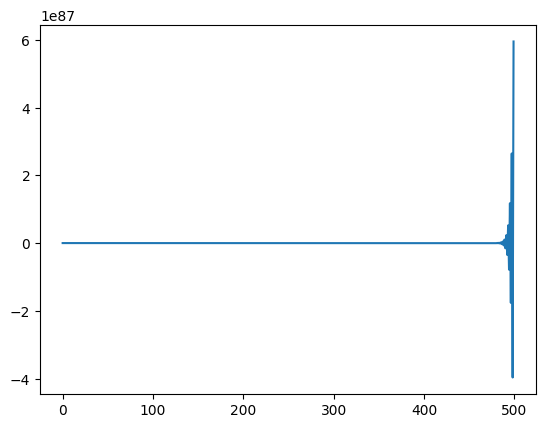

In [36]:
plt.plot(x3)

In [37]:
roots3 = np.roots(ar_3)
print("Raízes do polinômio autoregressivo:", roots3)

Raízes do polinômio autoregressivo: [-1.5+0.j          0.4+0.48989795j  0.4-0.48989795j]


In [38]:
arma3 = sm.tsa.ArmaProcess(ar_3, ma_3)
print(isstationary(arma3))
print(isinvertible(arma3))

False
True


# 3.11

In [39]:
#1
ar1 = np.array([1])
ma1 = np.array([1,0.2,-0.6,-0.3])

In [40]:
x_1 = arma_generate_sample(ar=ar1, ma =ma1, nsample=500)

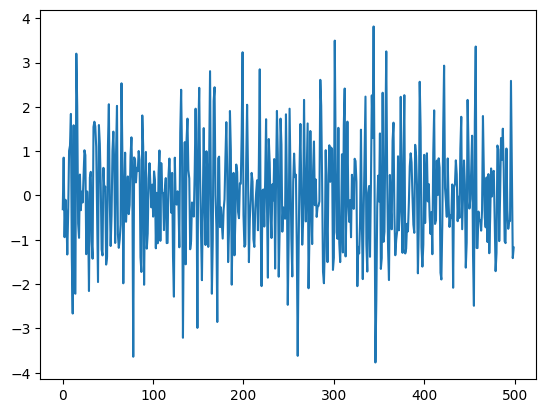

In [41]:
plt.plot(x_1)

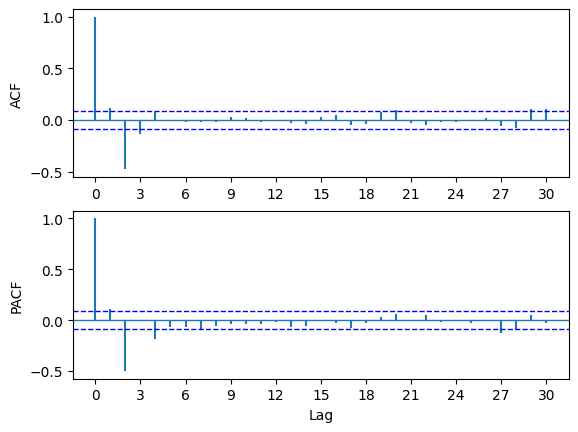

In [42]:
acf_pacf_fig(x_1, both = True)

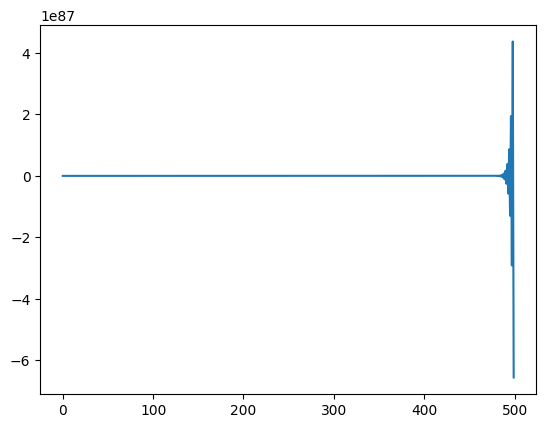

In [43]:
#2
ar2 = np.array([1, 0.7,-0.8, 0.6])
ma2 = np.array([1])
x_2 = arma_generate_sample(ar=ar2, ma =ma2, nsample=500)
plt.plot(x_2)

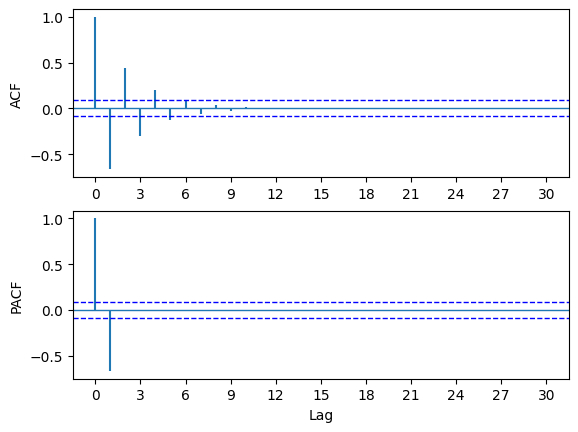

In [44]:
acf_pacf_fig(x_2, both = True)

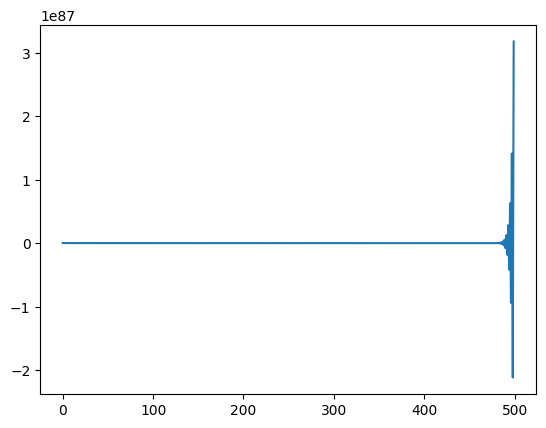

In [45]:
#3
ar3 = np.array([1, 0.7,-0.8, 0.6])
ma3 = np.array([1,-0.2,-0.6,0.3])
x_3 = arma_generate_sample(ar=ar3, ma =ma3, nsample=500)
plt.plot(x_3)

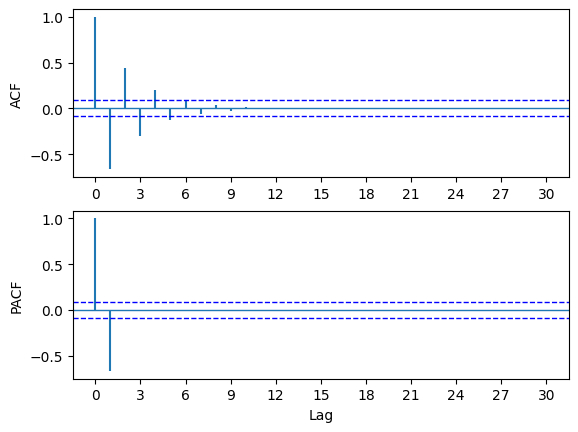

In [46]:
acf_pacf_fig(x_3, both = True)

# 3.1

In [106]:
from bcb import sgs

In [107]:
pib = sgs.get({'PIB Trimestral': 22099},
              start = '2000-01-01')

# Transforma a frequência da data em mensal
#pib.index = pib.index.to_period('Q')

In [108]:
pib

,PIB Trimestral
Date,
2000-01-01,106.40
2000-04-01,110.25
2000-07-01,114.19
2000-10-01,113.98
2001-01-01,110.10
...,...
2023-01-01,180.35
2023-04-01,183.61
2023-07-01,186.63


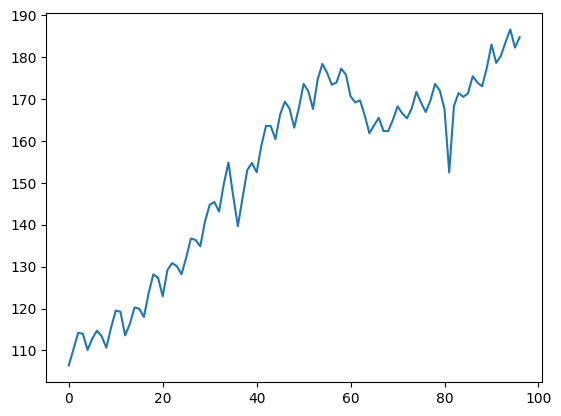

In [109]:
plt.plot(pib['PIB Trimestral'].values)

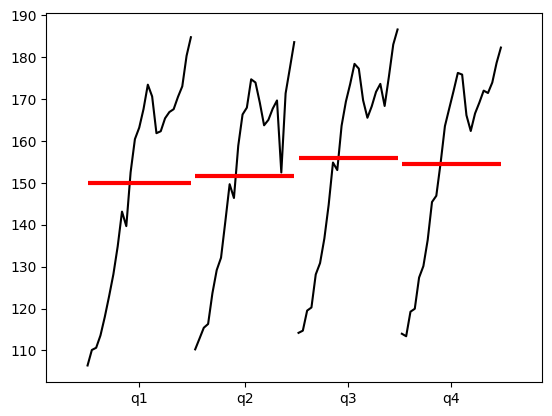

In [110]:
from statsmodels.graphics.tsaplots import quarter_plot
quarter_plot(pib)
plt.show()

In [111]:
pib_diff = pib.diff()

In [112]:
pib_diff = pib_diff.dropna()

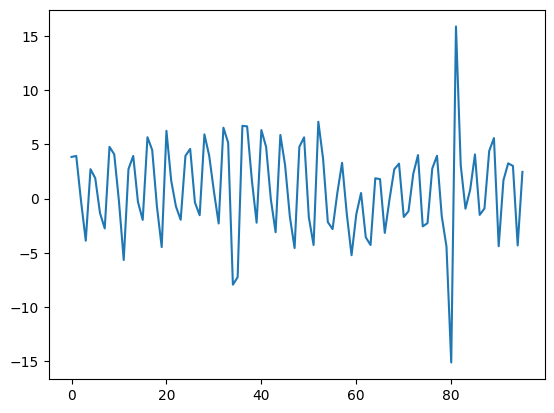

In [113]:
plt.plot(pib_diff.values)

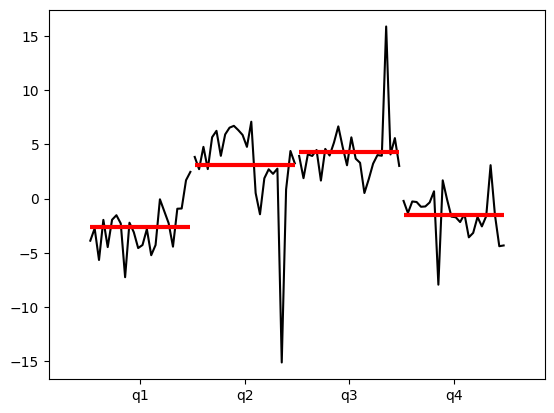

In [114]:
quarter_plot(pib_diff)
plt.show()

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [118]:
pib_diff = pd.DataFrame()
pib_diff = pib.diff()
pib_diff = pib_diff.dropna()

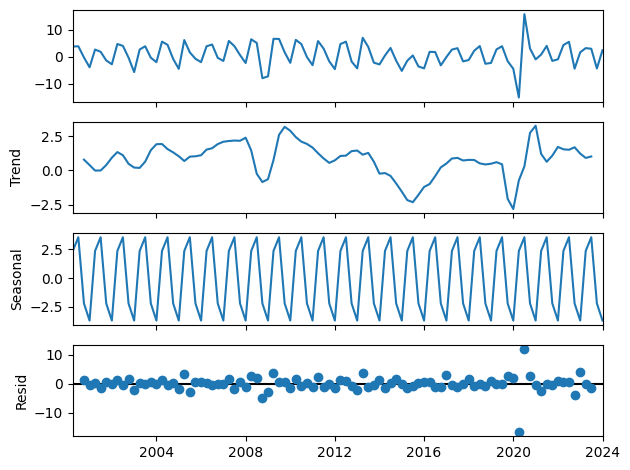

In [119]:
pib_diff_dec = seasonal_decompose(pib_diff, model = 'aditive') #multiplicative
pib_diff_dec.plot()
plt.show()

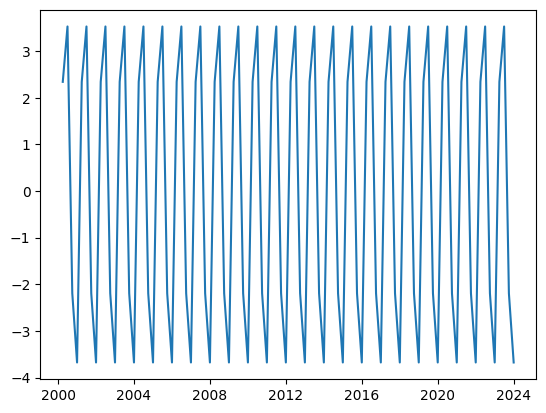

In [126]:
plt.plot(pib_diff_dec.seasonal)

In [147]:
pib_new = pd.DataFrame()
pib_new['Pib_diff'] = pib_diff
pib_new['Pib_sasonalidade'] = pib_diff_dec.seasonal
pib_new['Pibdesasonal'] = pib_new['Pib_diff'] - pib_new['Pib_sasonalidade'] 

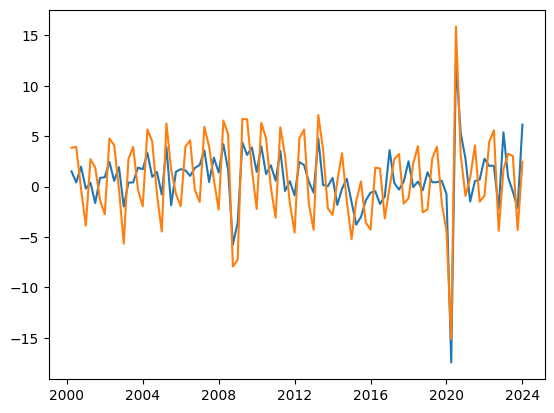

In [150]:
plt.plot(pib_new['Pibdesasonal'])
plt.plot(pib_new['Pib_diff'])

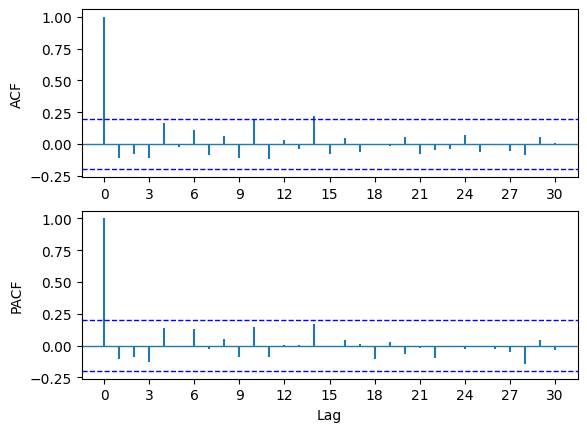

In [156]:
acf_pacf_fig(pib_new['Pibdesasonal'],both = True)

In [52]:
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

In [180]:
arma_mod = ARIMA(pib_new['Pibdesasonal'], order=(8, 0, 4), trend="n")
arma_res = arma_mod.fit()

C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\guilh\AppData\Roaming\Python\Python39\

In [182]:
print(arma_res.summary())

                               SARIMAX Results                                
Dep. Variable:           Pibdesasonal   No. Observations:                   96
Model:                 ARIMA(8, 0, 4)   Log Likelihood                -238.120
Date:                Mon, 29 Jul 2024   AIC                            502.239
Time:                        17:26:32   BIC                            535.576
Sample:                    04-01-2000   HQIC                           515.715
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5733      0.395      1.451      0.147      -0.201       1.348
ar.L2         -0.1975      0.534     -0.370      0.712      -1.245       0.850
ar.L3         -0.4484      0.614     -0.731      0.4

In [187]:
h = 8
forecast = arma_res.forecast(h)
seasonal_effect = pib_diff_dec.seasonal[-h:]  # Últimos 4 valores sazonais

# Adicionar o componente sazonal à previsão
forecast_with_seasonality = forecast + seasonal_effect.values

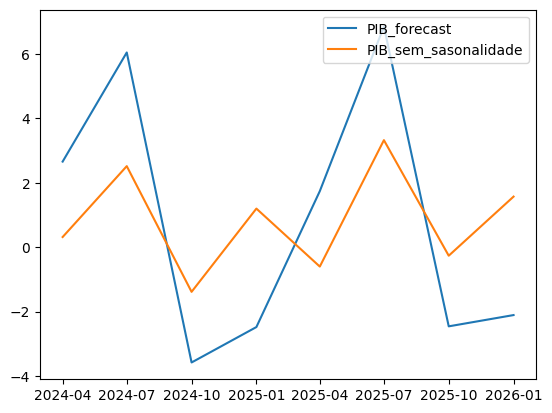

In [188]:
plt.plot(forecast_with_seasonality, label = 'PIB_forecast')
plt.plot(forecast, label = 'PIB_sem_sasonalidade')
plt.legend()